## NLP Final Project

Bu projede datamız, Mayıs 1996'dan Temmuz 2014'e kadar listelenen tüm elektronik ürünler için Amazon müşteri yorumlarını içermektedir. 63.001 benzersiz ürün için toplam 192.403 müşteri tarafından toplam 1.689.188 yorum bulunmaktadır.Burada sadece 10000 veriyle çalışıp NLP tekniklerini uygulayacağız.Yani metni küçük harfe çevireceğiz,noktalama işaretlerini vb.kaldıracağız.Stopwordsleri kaldıracağız.Kelimeleri vektörize edeceğiz.Wordcloud oluşturup "Overall" sütununa göre modelleme yapacağız.Modelleme yaparken de "NeatText" kütüphanesini kullanacağız.

<img src='amazon.jpg' width=450 >

### Kütüphaneleri Yükleme

In [1]:
import nltk
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

In [2]:
#df.to_csv("amazon.csv")
#Csv dosyasına dönüştürüyoruz.

In [3]:
#from google.colab import files
#files.download("amazon.csv")
#Dosyayı indiriyoruz.

In [4]:
#df=pd.read_csv("amazon_data.csv")
#Dosyamızı csv dosyasından okuyoruz.

In [5]:
#df=df.sample(10000)

In [6]:
#df.to_csv('amazon_veri.csv', index=False)
#Seçtiğimiz kısmı bir csv dosyasına kaydedip,indexini sıfırlıyoruz.Buradan devam edeceğiz.

In [7]:
df=pd.read_csv('amazon_veri.csv')
#Kaydettiğimiz dosyayı okuyoruz.

### EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [8]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1313359,A2DP9QKJH0PATQ,B007O0IB6O,SENDY SOEDOMO,"[0, 1]",My wife love this case on her iPad 3. Fit is e...,5,Wife loves this case for iPad 3.,1386720000,"12 11, 2013"
1,350481,A340LR5EE970EJ,B000YJ0O9O,RLS,"[0, 0]",A must have for the on the go photographer. It...,4,Protect your gear.,1381968000,"10 17, 2013"
2,1567527,A2EOPK44CNHX3R,B00BN0MZY0,Dani,"[0, 0]",I bought this for my son's iPad. the set is gr...,5,Great,1396224000,"03 31, 2014"
3,1187429,A2A9YZZON2LG7G,B005TUQV0E,"Tere Mateora Ngarua ""&#34;plop&#34;""","[0, 0]","Nice little memory card for it's size, loads o...",5,Lots of storage for a tiny card.,1360800000,"02 14, 2013"
4,88653,A2FRFAQCWZJT3Q,B0001DHHIY,"B. Davis ""The Happy Hermit""","[2, 2]",This adapter installs so easy and it works gre...,5,Great product and tech support,1169164800,"01 19, 2007"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10000 non-null  int64 
 1   reviewerID      10000 non-null  object
 2   asin            10000 non-null  object
 3   reviewerName    9861 non-null   object
 4   helpful         10000 non-null  object
 5   reviewText      9992 non-null   object
 6   overall         10000 non-null  int64 
 7   summary         10000 non-null  object
 8   unixReviewTime  10000 non-null  int64 
 9   reviewTime      10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [10]:
df.shape

(10000, 10)

In [11]:
df=df[['reviewText','overall','summary']]
#Lazım olan sütunları seçiyoruz.

In [12]:
df.columns=['text','overall','summary']
#Sütunları tekrar isimlendiriyoruz.

In [13]:
df.isnull().sum()

,0
text,8
overall,0
summary,0


In [14]:
df=df.dropna()
#Boş değerleri siliyoruz.

In [15]:
import html

df = html.unescape(df)

#Html işaretlerini kaldırıyoruz.

In [16]:
pattern = r"\&\#[0-9]+\;"
df["text"] = df["text"].str.replace(pat=pattern, repl="", regex=True)

In [17]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)
#Noktalama işaretlerini vb.diğer ifadeleri kaldırıyorzm.

In [18]:
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["text"] = df["text"].apply(remove_accent)
#Metinlerdeki aksanları yani farklı alfabe harflerine sahip olanları kaldırıyoruz.

In [19]:
df['overall'].value_counts()

,count
overall,
5,6005
4,1996
3,841
1,652
2,498


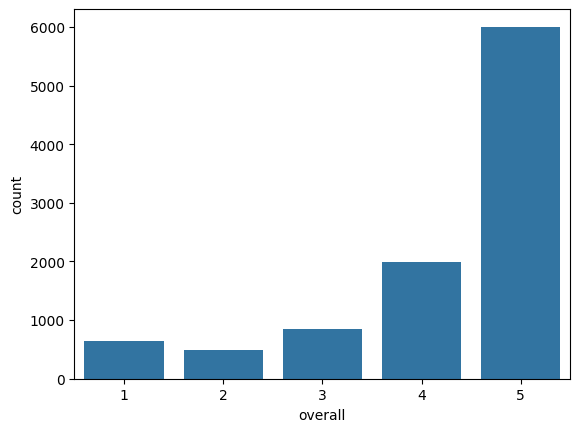

In [20]:
sns.countplot(x=df['overall']);

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### İngilizce Olmayan Dilleri Ayırma

In [23]:
#pip install langdetect

In [24]:
from langdetect import detect
df['lang']=df['text'].apply(lambda x: detect(x))

In [25]:
df['lang'].value_counts()

,count
lang,
en,9968
es,10
ro,4
af,4
sw,2
it,1
pt,1
so,1
cy,1


In [26]:
import matplotlib.pyplot as plt

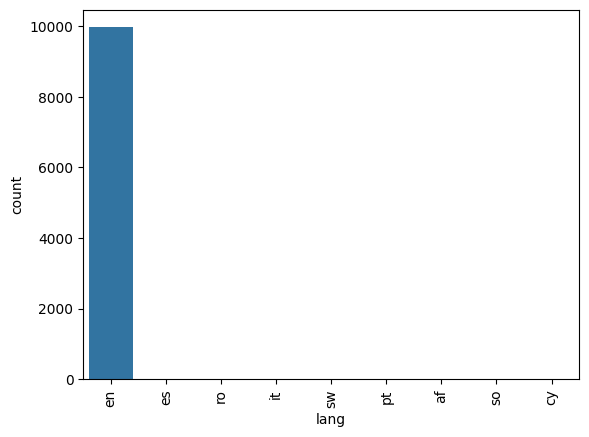

In [27]:
sns.countplot(x=df['lang'])
plt.xticks(rotation=90);

In [28]:
df[df['lang'] == 'es']
#Farklı dilde olan yorumlara bir örnek

,text,overall,summary,lang
1158,definitivamente samsung sigue por el buen cami...,5,"Un reproductor 3D muy Bueno, Bonito y Barato l...",es
1684,es bastate bueno el estuche completamente nuev...,5,Resistente,es
3763,creo que este es uno de los mejores headphones...,5,Los mejores headphones que probe en tiempo,es
3925,el tejido del estuche estaacute muy bien fabri...,3,Podr&iacute;a mejorarse - could be improved,es
3967,por el bajo precio que cuesta este kit conside...,4,STARTER KIT For The Kodak,es
5253,compre varios conectores cables etc para mis p...,5,Super economicos para el mismo fin.,es
6030,para tener de repuesto no me ha generado probl...,5,WITHOUT PROBLEMS,es
6312,tengo un toshiba satellite con windows xp home...,5,Excelente upgrade para laptop,es
7686,buena camara tiene funciones erscecionales lo ...,5,BUENA CAMARA,es
8662,este es casi un excelente reproductor tiene un...,4,Muy buen reproductor MP#,es


In [29]:
df = df[df['lang'] == 'en']
#Sadece ingilizce olanları alıyoruz.

In [30]:
df['lang'].value_counts()

,count
lang,
en,9968


### Sentiment Analizi

In [31]:
df.loc[(df['overall']==1)|(df['overall']==2),'sentiment']='negative'
df.loc[(df['overall']==3,'sentiment')]='neutral'
df.loc[(df['overall']==4)|(df['overall']==5),'sentiment']='positive'

In [32]:
df.head()

,text,overall,summary,lang,sentiment
0,my wife love this case on her ipad fit is exc...,5,Wife loves this case for iPad 3.,en,positive
1,a must have for the on the go photographer it ...,4,Protect your gear.,en,positive
2,i bought this for my sons ipad the set is grea...,5,Great,en,positive
3,nice little memory card for its size loads of ...,5,Lots of storage for a tiny card.,en,positive
4,this adapter installs so easy and it works gre...,5,Great product and tech support,en,positive


In [33]:
df['sentiment'].value_counts()

,count
sentiment,
positive,7983
negative,1148
neutral,837


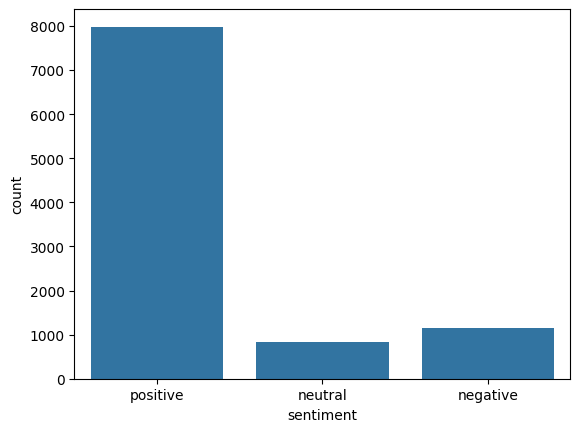

In [34]:
sns.countplot(x=df['sentiment']);

### WordCloud

In [35]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [36]:
def wc(data,bgcolor):
    plt.figure(figsize=(6,6))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords='STOPWORDS',mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

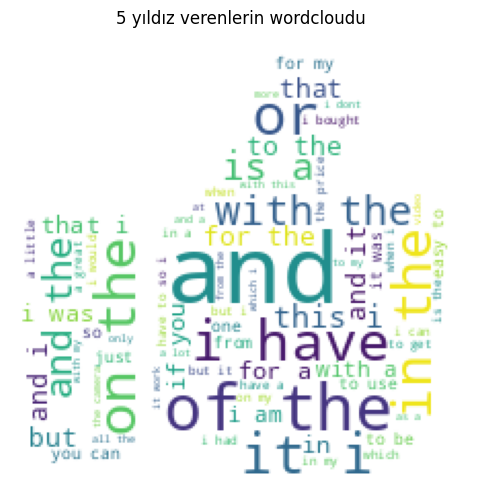

In [37]:
like=df[df['overall']==5]['text']
wc(like,'white')
plt.title('5 yıldız verenlerin wordcloudu');

In [38]:
def wc(data,bgcolor):
    plt.figure(figsize=(6,6))
    mask=np.array(Image.open('dislike.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

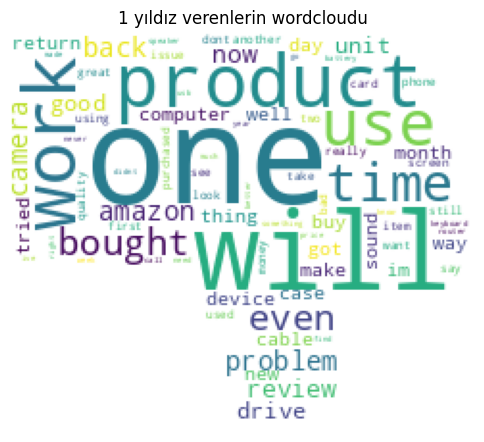

In [39]:
dislike=df[df['overall']==1]['text']
wc(dislike,'white')
plt.title('1 yıldız verenlerin wordcloudu');

In [40]:
pozitive=df[df['sentiment']=='positive']['text']
negative=df[df['sentiment']=='negative']['text']
neutral=df[df['sentiment']=='neutral']['text']

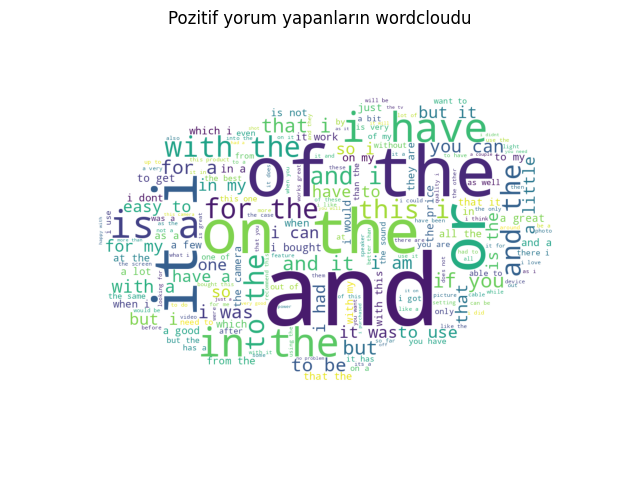

In [41]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords='STOPWORDS', mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

wc(pozitive)
plt.title('Pozitif yorum yapanların wordcloudu');

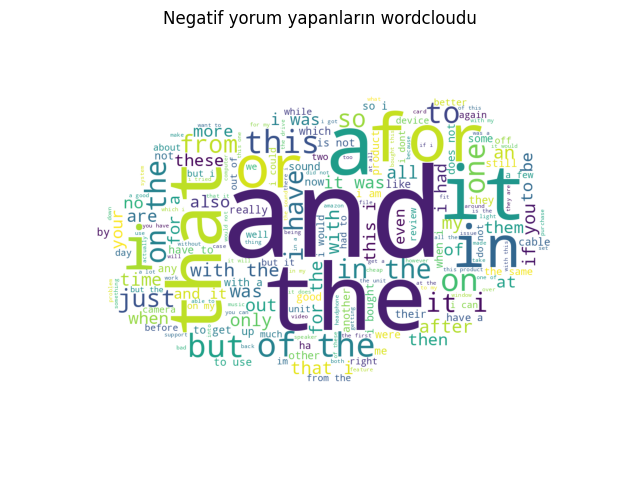

In [42]:
wc(negative)
plt.title('Negatif yorum yapanların wordcloudu');

In [43]:
neutral.sample(7)

,text
3586,this monitor is good for the price it is not ...
8063,great little case fits well though yes it is h...
3594,i was mainly curious about a mike one could pl...
8237,once its set up and working the logitech harmo...
3268,i had this for a year nowthe design is sleek a...
3165,i ordered this case at the same time as my kin...
1205,my kit arrived with a bent set screw that made...


In [45]:
neutral[1205]

'my kit arrived with a bent set screw that made the unit unusable until i could get to a hardware store and get a new one  the beauty dish works okay but will not hold up to moderate or heavy use  the honeycomb grid is useless  it doesnt attach properly so unless your have some gaffers tape you have nothing  the snouts are okay but kind of cheesyall in all if you are a casual user and want to have an inexpensive piece of equipment to see if you would like these type of modifyers this isnt a bad first step'

In [46]:
df['text'].sample(10)

,text
625,i have used three of these and they are the be...
3822,i read the other reviews this company appears ...
1206,does not let any humidity in between the filte...
6821,i just purchased this and found that i had rec...
1251,bought this sony cpac years ago to use with m...
6204,if you like all the bells and whisles then may...
3856,i upgraded to this subwoofer from the polk aud...
6920,we bought this hoping to get rid of cable and ...
3594,i was mainly curious about a mike one could pl...
1047,it took a while to purchase a good point and s...


In [47]:
df['text'][5982]

'though not the greatest build quality this device is certainly worth the price paid for it if youre looking for an inexpensive gift for someone this is a great option to go along with a digital picture frame'

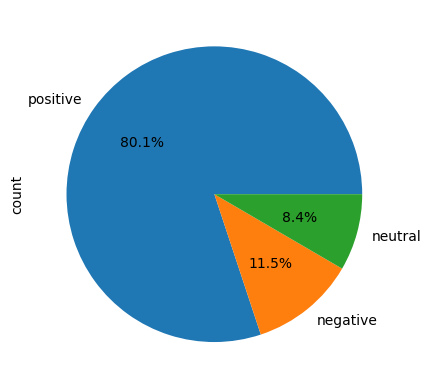

In [48]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%');

### Polarity-Subjectivity

In [49]:
from textblob import TextBlob

In [50]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [51]:
df.head()

,text,overall,summary,lang,sentiment,polarity,subjectivity
0,my wife love this case on her ipad fit is exc...,5,Wife loves this case for iPad 3.,en,positive,0.501786,0.592857
1,a must have for the on the go photographer it ...,4,Protect your gear.,en,positive,0.000000,0.000000
2,i bought this for my sons ipad the set is grea...,5,Great,en,positive,0.229091,0.493636
3,nice little memory card for its size loads of ...,5,Lots of storage for a tiny card.,en,positive,0.368750,0.600000
4,this adapter installs so easy and it works gre...,5,Great product and tech support,en,positive,0.432381,0.693810


## NeatText

In [52]:
#pip install neattext

In [53]:
import neattext as nt

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [55]:
df.head()

,text,overall,summary,lang,sentiment,polarity,subjectivity
0,my wife love this case on her ipad fit is exc...,5,Wife loves this case for iPad 3.,en,positive,0.501786,0.592857
1,a must have for the on the go photographer it ...,4,Protect your gear.,en,positive,0.000000,0.000000
2,i bought this for my sons ipad the set is grea...,5,Great,en,positive,0.229091,0.493636
3,nice little memory card for its size loads of ...,5,Lots of storage for a tiny card.,en,positive,0.368750,0.600000
4,this adapter installs so easy and it works gre...,5,Great product and tech support,en,positive,0.432381,0.693810


In [56]:
all=' '.join(df['text'])
#Text sütunundaki bütün satırları birleştiriyoruz.

In [57]:
sent=nt.TextFrame(all)
#Bunları bir textframe'e çeviriyoruz.

In [58]:
sent.describe()

Key      Value          
Length  : 6160661        
vowels  : 1893301        
consonants: 3073750        
stopwords: 638902         
punctuations: 366            
special_char: 366            
tokens(whitespace): 1155319        
tokens(words): 1155319        


In [92]:
sent.length
#Text frame'in kaç kelimeden oluştuğu.

6160661

In [59]:
sent.readability()
#Cümlelerin okunabilme oranı,description kısmı normalde kaç yaşa önerildiğini de gösteriyordu.Ama burada çıkmamış.

{'automated readability': 596625.3874815817, 'description': None}

## Modelleme

In [60]:
x=df['text']
y=df['overall']

In [61]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2, random_state=42)

In [63]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [64]:
y_pred=clf.predict(x_test)

In [65]:
accuracy_score(y_pred, y_test)

0.5902708124373119

In [66]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.01      0.38      0.02         8
           5       1.00      0.59      0.74      1986

    accuracy                           0.59      1994
   macro avg       0.20      0.19      0.15      1994
weighted avg       1.00      0.59      0.74      1994



In [67]:
confusion_matrix(y_pred, y_test)

array([[   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   1,    1,    2,    3,    1],
       [ 145,  112,  176,  379, 1174]])

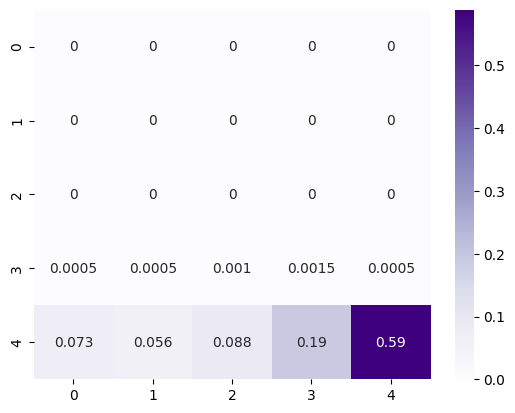

In [69]:
cm = confusion_matrix(y_pred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [77]:
#SVC

In [78]:
svm=Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC())])

In [79]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [80]:
y_pred=svm.predict(x_test)

In [81]:
accuracy_score(y_pred, y_test)

0.6078234704112337

In [82]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.13      0.95      0.23        20
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.08      0.45      0.14        69
           5       0.99      0.61      0.75      1905

    accuracy                           0.61      1994
   macro avg       0.24      0.40      0.22      1994
weighted avg       0.95      0.61      0.73      1994



In [83]:
confusion_matrix(y_pred, y_test)

array([[  19,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   3,    6,   17,   31,   12],
       [ 124,  107,  161,  351, 1162]])

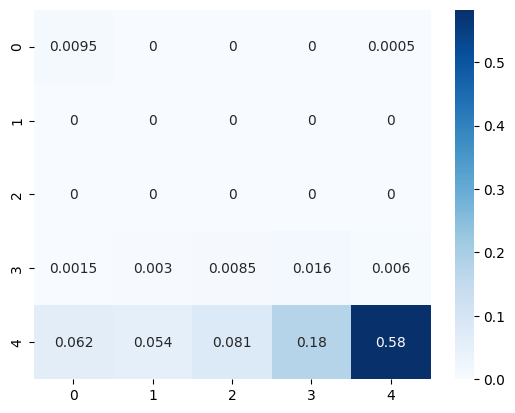

In [84]:
cm = confusion_matrix(y_pred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');

In [75]:
test2=["I am not happy with the new vacuum cleaner I bought. You say that you do not accept returns and do not make exchanges. I will complain about you."]

In [70]:
test1=['I really liked this coffee machine I bought recently. I will recommend it to my friends.']

In [88]:
test3=['This machine is very bad. I wish I had never bought it. I want to return it.']

In [73]:
print(clf.predict(test1))

[5]


In [76]:
print(clf.predict(test2))
#Bunu yanlış tahmin etti.

[5]


In [90]:
print(svm.predict(test3))

[1]


In [91]:
print(svm.predict(test1))

[5]


## Özet

Bu projede elimizde yaklaşık 1 milyon verisi olan bir amazon datası vardı.Proje çözülmüştü.Bizden daha kısa kodlarla çözmemiz istenmişti.Data çok büyük olduğu için burada 10000 veriyle çalıştık.İlk başta gerekli olan sütunları seçtik.İsimlerini değiştirdik.Boş olan değerleri sildik.Kelimeleri küçük harfe çevirdik.Rakamları vs.kaldırdık.Html,noktalama işareti vb.gibi olan işaretleri kaldırdık.Farklı alfabeden olan harfleri çıkardık.İngilizce dışındaki dilleri de kaldırdık.Daha sonra sentiment analizi yaptık.1 ve 2 yıldız verenlere negatif,3 yıldız verenlere nötr,4 ve 5 yıldız verenlere pozitif dedik.Bunların wordcloud'unu oluşturduk.Metinlerdeki öznellik yani subjectivity ve polarity yani metnin yüzde kaç olumlu,olumsuz olduğunu hesapladık.Neattext paketiyle modellemeye geçtik.sent.describe ile cümlelerdeki özellikleri inceledik.Kaç tane hece olduğunu,stopwordsleri vs.gördük.Bütün toplam metnin kaç kelimeden oluştuğunu gördük.Vektörize etme işlemini zaten kendisi tek bir satır kodun içinde yapabiliyor.X ve y'yi belirledikten sonra model eğitme kısmına geçtik.Modelin başarı oranı yüzde 60 çıktı.Daha sonra birkaç örnek test cümlesiyle modeli test ettik.Başarı oranı biraz düşük olduğu için bazılarını doğru tahmin edemedi.Diğer eğittiğimiz model ile de test yaptık.Sonra projemizi tamamladık.